In [44]:
import PIL
from PIL import Image

In [45]:
import os
train_dogs_dir = os.path.join('E:/cnn_imgs_dataset/training_set/dogs')
train_cats_dir = os.path.join('E:/cnn_imgs_dataset/training_set/cats')

In [46]:
print(train_dogs_dir)
print(train_cats_dir)

E:/cnn_imgs_dataset/training_set/dogs
E:/cnn_imgs_dataset/training_set/cats


In [47]:
validation_dogs_dir = os.path.join('E:/cnn_imgs_dataset/test_set/dogs')
validation_cats_dir = os.path.join('E:/cnn_imgs_dataset/test_set/cats')

In [48]:
print(validation_dogs_dir)
print(validation_cats_dir)

E:/cnn_imgs_dataset/test_set/dogs
E:/cnn_imgs_dataset/test_set/cats


In [49]:
print('Total training dogs images: ', len(os.listdir(train_dogs_dir)))
print('Total training cats images: ', len(os.listdir(train_cats_dir)))

Total training dogs images:  3762
Total training cats images:  4000


In [50]:
print('Total Validation dogs images: ', len(os.listdir(validation_dogs_dir)))
print('Total Validation cats images: ', len(os.listdir(validation_cats_dir)))

Total Validation dogs images:  1000
Total Validation cats images:  1000


In [51]:
train_dogs_name=os.listdir(train_dogs_dir)
train_cats_name=os.listdir(train_cats_dir)
print(train_dogs_name[:10])
print(train_cats_name[:10])

['dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.1001.jpg', 'dog.1002.jpg', 'dog.1003.jpg', 'dog.1004.jpg', 'dog.1005.jpg', 'dog.1006.jpg']
['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.1001.jpg', 'cat.1002.jpg', 'cat.1003.jpg', 'cat.1004.jpg', 'cat.1005.jpg', 'cat.1006.jpg']


In [52]:
validation_dogs_name=os.listdir(validation_dogs_dir)
validation_cats_name=os.listdir(validation_cats_dir)
print(validation_dogs_name[:10])
print(validation_cats_name[:10])

['dog.4001.jpg', 'dog.4002.jpg', 'dog.4003.jpg', 'dog.4004.jpg', 'dog.4005.jpg', 'dog.4006.jpg', 'dog.4007.jpg', 'dog.4008.jpg', 'dog.4009.jpg', 'dog.4010.jpg']
['cat.4001.jpg', 'cat.4002.jpg', 'cat.4003.jpg', 'cat.4004.jpg', 'cat.4005.jpg', 'cat.4006.jpg', 'cat.4007.jpg', 'cat.4008.jpg', 'cat.4009.jpg', 'cat.4010.jpg']


In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import random

# Declearing parameters for rows and col
ncols=4
nrows=4

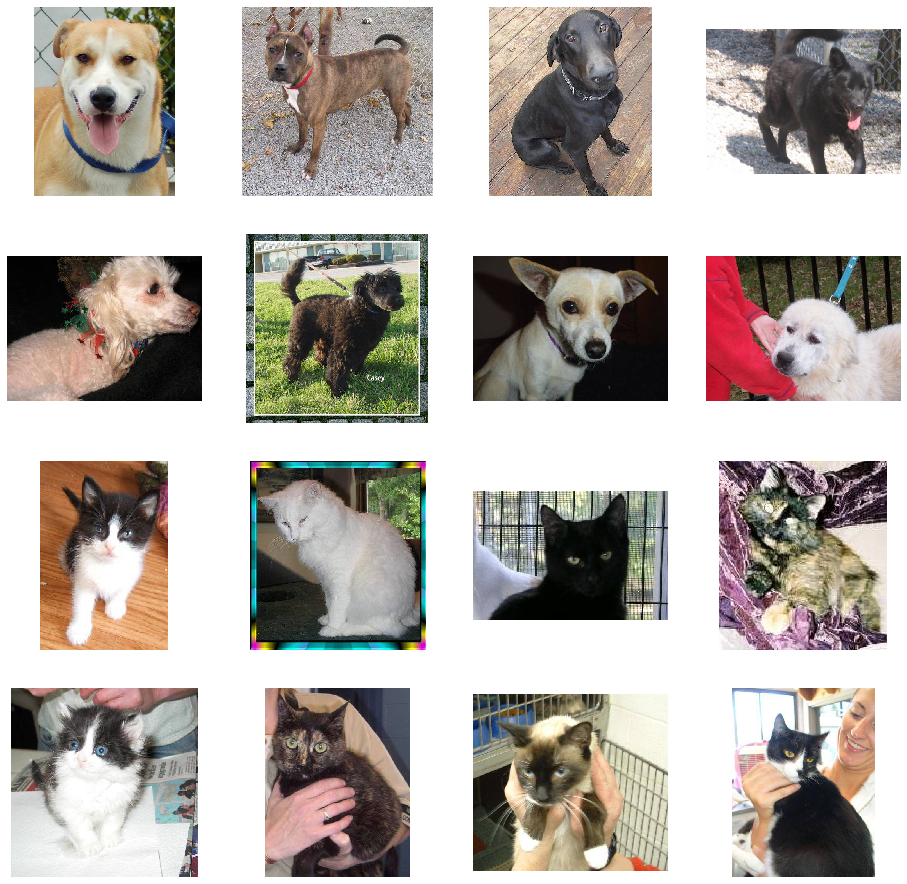

In [63]:
# Picking the ransom no of images form total set
pic_dogs_index = random.randrange(0,3750)
pic_cats_index = random.randrange(0,3990)

# Set up a matploit fig and size it to fit 4*4
fig = plt.gcf()   # get current figure if not it creates
fig.set_size_inches(ncols*4,nrows*4)  # Defining the fig

next_dog = [os.path.join(train_dogs_dir, fname)
           for fname in train_dogs_name[pic_dogs_index-8:pic_dogs_index]]
next_cat = [os.path.join(train_cats_dir, fname)
           for fname in train_cats_name[pic_cats_index-8:pic_cats_index]]

for i,img_path in enumerate(next_dog+next_cat):
    sp=plt.subplot(ncols,nrows, i+1)   # Drawing subplots of 4 x 4 with i itteration and making next subplot
    sp.axis('off')# Grid type not shown
    img = npimg.imread(img_path)
    plt.imshow(img)
plt.show()    



In [67]:
import tensorflow as tf
# Defining the model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(64,64,3)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   tf.keras.layers.Dense(1 ,activation='sigmoid')])

In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
__________

In [69]:
# compliling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [70]:
# using Image Data Generator for rescaling and making train set and validation set
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./225)
validation_datagen = ImageDataGenerator(rescale=1./225)

In [71]:
training_set = train_datagen.flow_from_directory('E:/cnn_imgs_dataset/training_set',target_size=(64,64),batch_size=64,class_mode='binary')

Found 7762 images belonging to 2 classes.


In [72]:
validation_set = validation_datagen.flow_from_directory('E:/cnn_imgs_dataset/test_set',target_size=(64,64),batch_size=16,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [73]:
model.fit_generator(training_set,steps_per_epoch=8,epochs=10,
                    validation_data = validation_set,validation_steps=8)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
122/122 [==============================] - 236s 2s/step - loss: 0.6845 - acc: 0.5647 - val_loss: 0.6406 - val_acc: 0.6075
Epoch 2/10
122/122 [==============================] - 48s 394ms/step - loss: 0.5914 - acc: 0.6796 - val_loss: 0.5769 - val_acc: 0.6945
Epoch 3/10
122/122 [==============================] - 47s 389ms/step - loss: 0.5331 - acc: 0.7300 - val_loss: 0.5134 - val_acc: 0.7540
Epoch 4/10
122/122 [==============================] - 48s 392ms/step - loss: 0.4845 - acc: 0.7657 - val_loss: 0.5162 - val_acc: 0.7510
Epoch 5/10
122/122 [==============================] - 49s 399ms/step - loss: 0.4527 - acc: 0.7890 - val_loss: 0.5112 - val_acc: 0.7560
Epoch 6/10
122/122 [==============================] - 48s 390ms/step - loss: 0.4135 - acc: 0.8104 - val_loss: 0.5145 - val_acc: 0.7530
Epoch 7/10
122/122 [==============================] - 47s 389ms/step - loss: 0.3721 - acc: 0.8335 - val_loss: 0.5217 - val_acc: 0.7540
Epoch 8/1

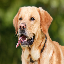

In [88]:
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
test_image = image.load_img('E:/cnn_imgs_dataset/single_prediction/dog2.jpg', target_size=(64,64))
test_image

In [89]:
x=image.img_to_array(test_image)
x=np.expand_dims(x,axis=0) 

In [90]:
x=preprocess_input(x)   # preprocessing with vgg16


In [91]:
classes = model.predict(x)

In [92]:
print(classes[0][0])

1.0


In [93]:
print(training_set.class_indices)

{'cats': 0, 'dogs': 1}


In [94]:
if classes[0][0] == 1:
    print('Its a Dog')
else:
    print('Its a cat')

Its a Dog


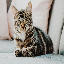

In [100]:
test_image = image.load_img('E:/cnn_imgs_dataset/single_prediction/cat1.jpg', target_size=(64,64))
test_image




In [101]:
x=image.img_to_array(test_image)
x=np.expand_dims(x,axis=0)



x=preprocess_input(x)   # preprocessing with vgg16

classes = model.predict(x)

In [102]:
print(classes[0][0])

0.0


In [103]:
if classes[0][0] == 1:
    print('Its a Dog')
else:
    print('Its a cat')

Its a cat
